# Ejercicio 1 - Mejoras en el Desempeño de Modelos de Clasificación

Este ejercicio se centra en el entrenamiento y evaluación de algunos modelos modelos de clasificación, sobre un conjunto de datos de campañas de marketing de productos bancarios, aplicando algunas estrategias de mejora del rendimiento de los modelos. Al considerar técnicas previas a los modelos se busca demostrar que el desempeño de éstos depende fuertemente del pre-procesamiento de los datos, más que un afinamiento de sus parámetros.

## Contexto: Análisis de éxito en campaña de marketing

Fuente: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

El *dataset* para este ejercicio contiene resultados de personas contactadas por una campaña de marketing y que compraron la oferta (atributo "OK" = yes o no), con cerca de 41.200 registros de personas.

Este conjunto de datos (abierto para este tipo de usos instruccionales), consiste en 20 atributos y 1 clase de etiquetas (totalizando 21 columnas) y corresponde a los datos de una campaña telefónica en Portugal, ofreciéndoles la contratación de un depósito a plazo. En varios casos, un cliente fue contactado varias veces antes de aceptar (OK = yes).

Algunos de los atributos relevantes son (combinando atributos categóricos, con numéricos):
* **Datos personales**: Edad, Ocupación, Estado Civil, Nivel de Educación.
* **Datos financieros**: Su casa tiene crédito hipotecario, default: si el crédito ha caído en quiebra; tiene un crédito de consumo.
* **Datos de contactos de la campaña actual**: Tipo de Comunicación (celular o teléfono fijo); Mes del último contacto; Día de la semana del contacto; duración de la llamada (segundos); Contacto: N° de contactos durante la campaña; DíasAtrás: días transcurridos desde último contacto; Resultado: resultado de la última llamada (falló, no-existe, éxito)
* **Datos socioeconómicos**: EmpTasaVar: tasa de variación de empleabilidad; IPC: índice de precios consumidor mensual; ICC: índice de confianza consumidor mensual; Euribor3m: tasa euribor de 3 meses indicador diario; NumEmpleados: cantidad de gente empleada, en indicador trimestral.

Esta adaptación en particular, por Rodrigo Sandoval y el equipo de R:Solver (RSolver.com), enfrenta diferentes objetivos de aprendizaje dentro de los cursos de Big Data y Machine Learning.



## Instrucciones Generales
En este caso, se busca entender el comportamiento y desempeño de diferentes modelos de clasificación sobre este conjunto de datos, para predecir la variable de interés: **OK**, que servirá para predecir en casos futuros, según los datos de contactabilidad de un cliente, si el cliente aceptará o no contratar el depósito a plazo.

Todos los alumnos deben contestar las preguntas que se indican en las secciones de "Preguntas", más adelante, las que se enfocan en tareas de pre-procesamiento del conjunto de datos, para lograr mejoras en el desempeño del modelo de predicción categórica. Se puede recurrir a ejercicios de otras fuentes, así como al material de clases. Deben entregar un informe simple (de 1 ó 2 páginas) en formato PDF solamente, en el que se incluyen los nombres de los integrantes ordenados alfabéticamente por apellido dentro de la primera página.

La plantilla de informe está en http://dcc.rsolver.com/dcc/docs/InformeActividad.docx

El informe en formato PDF debe ser subido por sólo uno de los integrantes  en el portal del curso en el espacio designado.

Si no estuvieste habilitado, alternativamente se puede subir en la siguiente URL

http://aiker.rsolver.com/aiker/DocUpload.aspx (*)

(*) Sólo si hay problemas en la carga, enviar el PDF a rsandova@ing.puc.cl y cc: ayudante@aiker.ai, pero no se requiere como respaldo de la entrega.

## Preparación - Paso 1: Instalación de las librerías de modelos de clasificación

Esto se ejecuta sólo una vez al comienzo de la sesión de cada persona. No se necesita volver a ejecutar con cada nueva prueba del resto de los scripts o bloques.

In [ ]:
# Esto toma entre 6 y 8 minutos
install.packages('e1071')
install.packages('caret')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('randomForest')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Preparación - Paso 2: Carga de los datos

En este bloque se cargan los datos desde la URL de origen y luego muestra un encabezado con las primeras filas del dataset, para demostrar la disponibilidad de los datos.

Esto también puede ser ejecutado una sola vez, o volver a ejecutar cuando nuevamente se necesite trabajar con los datos originales.

In [ ]:
# Se declara la URL de dónde obtener los datos
theUrlMain <- "http://www.rsolver.com/dcc/docs/bank-additional-full.csv"

# Se declaran los nombres de las columnas
columnas = c("Edad","Ocupación","EstadoCivil","Educación","Default","Hipotecario","Consumo","Contacto","Mes","Día",
             "Duración","NumContactos","DíasAtrás","Previo","ResultadoPrevio", "EmpTasaVar", "IPC", "ICC", "Euribor3m", "NumEmpleados", "OK")

# Se cargan datos principales a una estructura (marketing.data), asignando nombres de atributos a las columnas.
# Nótese que se incluye la conversión de valores "unknown" a "NA" para facilitar la gestión vacíos más adelante.
marketing.data <- read.table(file = theUrlMain, header = TRUE, sep = ";", col.names = columnas, na.strings=c("unknown","NA"))

# Se muestran las primeras líneas del dataset, incluyendo nombres asignados a las columnas.
# Nótese que ya no hay "unknown", sino que sólo "NA", lo que permite a las operaciones is.na() y na.omit() operar fácilmente
head(marketing.data, 20)
dim(marketing.data)

summary(marketing.data)

,Edad,Ocupación,EstadoCivil,Educación,Default,Hipotecario,Consumo,Contacto,Mes,Día,⋯,NumContactos,DíasAtrás,Previo,ResultadoPrevio,EmpTasaVar,IPC,ICC,Euribor3m,NumEmpleados,OK
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,41,blue-collar,married,NA,NA,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,24,technician,single,professional.course,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


[1] 41188    21

      Edad        Ocupación         EstadoCivil         Educación        
 Min.   :17.00   Length:41188       Length:41188       Length:41188      
 1st Qu.:32.00   Class :character   Class :character   Class :character  
 Median :38.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.02                                                           
 3rd Qu.:47.00                                                           
 Max.   :98.00                                                           
   Default          Hipotecario          Consumo            Contacto        
 Length:41188       Length:41188       Length:41188       Length:41188      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

## Preparación - Paso 3: Complemento de Clasificación Inicial

A continuación se implementa un proceso de clasificación inicial, sin alterar el conjunto de ejemplos y teniendo una proporción genérica de hold-out, con 60% de ejemplos para entrenamiento y 40% de ejemplos para evaluación. Se termina ejecutando un Decision Tree, mostrando sus indicadores de desempeño.

Esta ejecución de un modelo inicial sirve de comparación, evaluando cuánto influyen las mejoras al dataset y entrenamiento, que son parte de los ejercicios, en el desempeño de otros modelos más adelante.

**Análisis del desempeño del modelo de referencia**

Nótese que se muestra el desempeño del modelo con los datos de entrenamiento y a continuación con los datos de evaluación. Dentro de lo esperable, el accuracy para el conjunto entrenamiento tiende a ser levemente mejor.

Adicionalmente, se puede ver que el sensitivity (desempeño de la clase positiva o "yes") es notoriamente menor que el specificity, lo que evidencia un sobreajuste a responder "no" de parte del modelo, que se interpreta como una limitación o desempeño deficiente, que se espera poder mejorar.

Finalmente, el gráfico del Árbol de Decisión muestra que, de todos los atributos del dataset, los dos más significativos para armar las reglas de decisión de este Árbol de Decisión, son "NumEmpleados", "Duración" y "DíasAtrás".

In [ ]:
# Se cargan todas las librerías

library(caret)
library(rpart)
library(rpart.plot)
library(dplyr)
library(randomForest)
library(caret)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




[1] 24712    21

[1] 16476    21


****Desempeño Decision Tree en conjunto de entrenamiento****


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  21067  1320
       yes   832  1493
                                          
               Accuracy : 0.9129          
                 95% CI : (0.9093, 0.9164)
    No Information Rate : 0.8862          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5331          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.53075         
            Specificity : 0.96201         
         Pos Pred Value : 0.64215         
         Neg Pred Value : 0.94104         
             Prevalence : 0.11383         
         Detection Rate : 0.06042         
   Detection Prevalence : 0.09408         
      Balanced Accuracy : 0.74638         
                                          
       'Positive' Class : yes             
                  


---------------------------------------------------------

****Desempeño Decision Tree en conjunto de evaluación****


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  14080   860
       yes   569   967
                                          
               Accuracy : 0.9133          
                 95% CI : (0.9089, 0.9175)
    No Information Rate : 0.8891          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.5272          
                                          
 Mcnemar's Test P-Value : 1.7e-14         
                                          
            Sensitivity : 0.52928         
            Specificity : 0.96116         
         Pos Pred Value : 0.62956         
         Neg Pred Value : 0.94244         
             Prevalence : 0.11089         
         Detection Rate : 0.05869         
   Detection Prevalence : 0.09323         
      Balanced Accuracy : 0.74522         
                                          
       'Positive' Class : yes             
                  

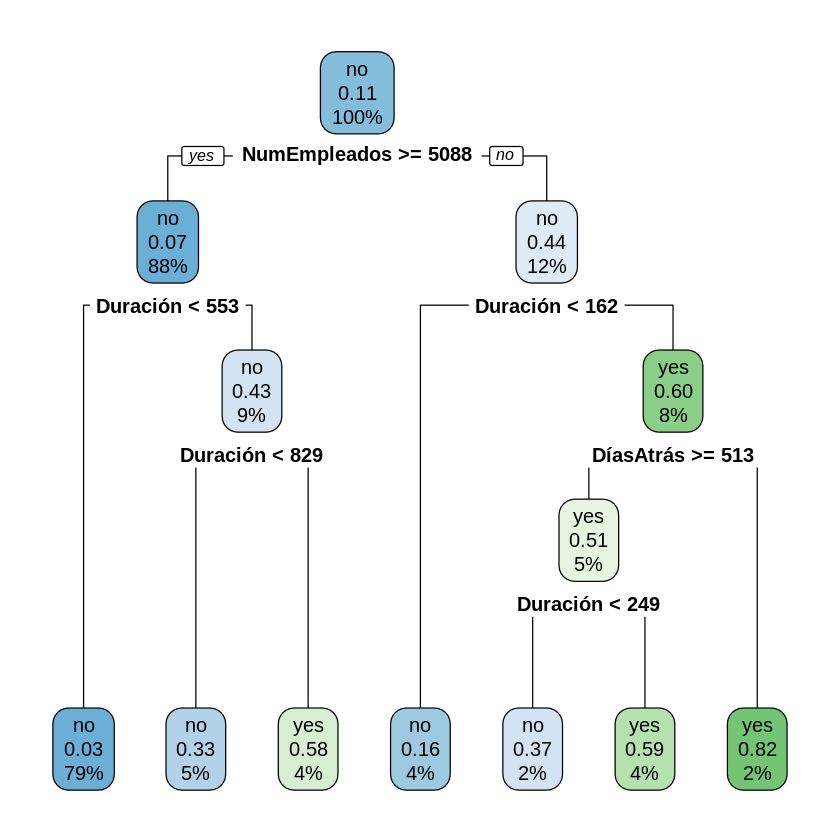

In [ ]:
# Primero se separa el conjunto de ejemplos (marketing.data) en 2,
# uno de entrenamiento y otro de evaluación usando la técnica hold-out,
# que consiste en crear dos conjuntos disjuntos en una proporción dada

set.seed(123)
ratio = sample(1:nrow(marketing.data), size = 0.60*nrow(marketing.data)) # Proporción: 60% / 40%
training.data = marketing.data[ratio,]
testing.data = marketing.data[-ratio,]

# Se muestra la cantidad de ejemplos de cada uno de los dos conjuntos (en la proporción indicada)
dim(training.data)
dim(testing.data)

# Luego se entrena un modelo de clasificación Decision Tree usando el conjunto Train
# y posteriormente se evalúa con predict() para obtener los indicadores de desempeño

# Decision Tree
DT_model <- rpart(as.factor(OK) ~ ., data=training.data, method="class", minbucket=10)

cat("\n****Desempeño Decision Tree en conjunto de entrenamiento****\n")
DT_predict_train <- predict(DT_model, training.data, type = "class")
confusionMatrix(DT_predict_train, as.factor(training.data$OK), positive="yes")

cat("\n---------------------------------------------------------\n")
cat("\n****Desempeño Decision Tree en conjunto de evaluación****\n")
DT_predict_test <- predict(DT_model, testing.data, type = "class")
confusionMatrix(DT_predict_test, as.factor(testing.data$OK), positive="yes")
rpart.plot(DT_model)



****Desempeño Decision Tree en conjunto de entrenamiento 2****
**Sin NumEmpleados, DíasAtrás, ResultadoPrevio ni Euribor3m***


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  20622  1041
       yes  1277  1772
                                          
               Accuracy : 0.9062          
                 95% CI : (0.9025, 0.9098)
    No Information Rate : 0.8862          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5515          
                                          
 Mcnemar's Test P-Value : 1.055e-06       
                                          
            Sensitivity : 0.62993         
            Specificity : 0.94169         
         Pos Pred Value : 0.58117         
         Neg Pred Value : 0.95195         
             Prevalence : 0.11383         
         Detection Rate : 0.07171         
   Detection Prevalence : 0.12338         
      Balanced Accuracy : 0.78581         
                                          
       'Positive' Class : yes             
                  


---------------------------------------------------------

****Desempeño Decision Tree en conjunto de evaluación 2****
*Sin NumEmpleados, DíasAtrás, ResultadoPrevio ni Euribor3m*


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  13784   695
       yes   865  1132
                                          
               Accuracy : 0.9053          
                 95% CI : (0.9007, 0.9097)
    No Information Rate : 0.8891          
    P-Value [Acc > NIR] : 6.929e-12       
                                          
                  Kappa : 0.5386          
                                          
 Mcnemar's Test P-Value : 1.879e-05       
                                          
            Sensitivity : 0.61959         
            Specificity : 0.94095         
         Pos Pred Value : 0.56685         
         Neg Pred Value : 0.95200         
             Prevalence : 0.11089         
         Detection Rate : 0.06871         
   Detection Prevalence : 0.12121         
      Balanced Accuracy : 0.78027         
                                          
       'Positive' Class : yes             
                  

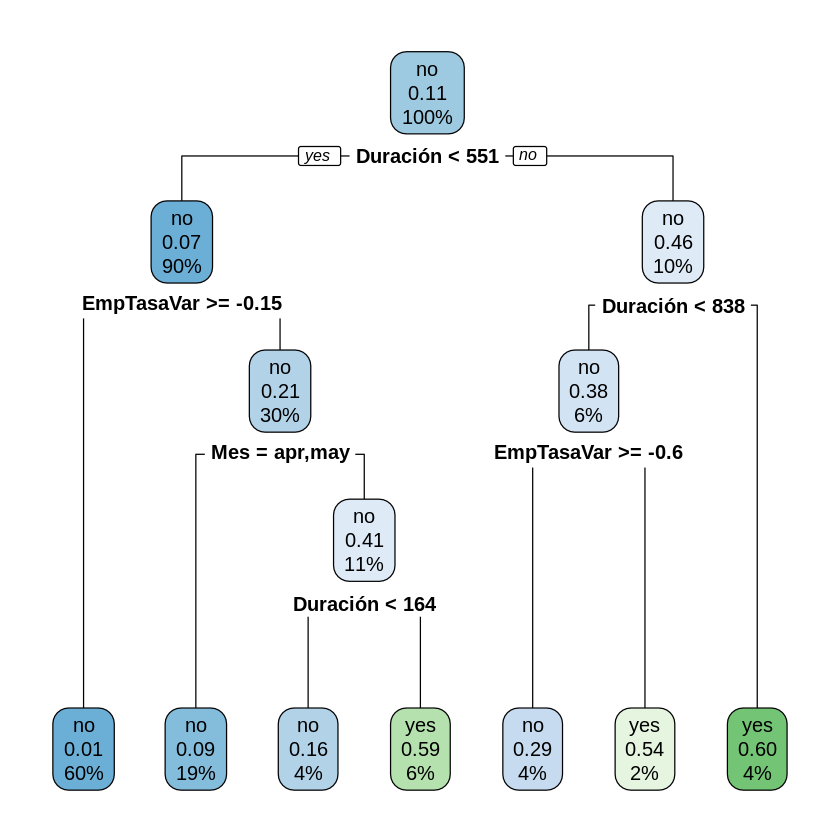

In [ ]:
# Se genera un nuevo dataframe editado, sin algunas columnas
training.data2 <- select(training.data, !c("NumEmpleados", "DíasAtrás", "ResultadoPrevio", "Euribor3m"))
testing.data2 <- select(testing.data, !c("NumEmpleados", "DíasAtrás", "ResultadoPrevio", "Euribor3m"))

# Decision Tree 2
DT_model2 <- rpart(as.factor(OK) ~ ., data=training.data2, method="class", minbucket=10)

cat("\n****Desempeño Decision Tree en conjunto de entrenamiento 2****\n")
cat("**Sin NumEmpleados, DíasAtrás, ResultadoPrevio ni Euribor3m***\n")
DT_predict_train2 <- predict(DT_model2, training.data2, type = "class")
confusionMatrix(DT_predict_train2, as.factor(training.data2$OK), positive="yes")

cat("\n---------------------------------------------------------\n")
cat("\n****Desempeño Decision Tree en conjunto de evaluación 2****\n")
cat("*Sin NumEmpleados, DíasAtrás, ResultadoPrevio ni Euribor3m*\n")
DT_predict_test2 <- predict(DT_model2, testing.data2, type = "class")
confusionMatrix(DT_predict_test2, as.factor(testing.data2$OK), positive="yes")
rpart.plot(DT_model2)



---


## Ejercicio: Limpieza, balanceo de datos y preparación conjuntos de entrenamiento y evaluación

El siguiente proceso prepara los datos para el entrenamiento y evaluación, realizando algunas operaciones de limpieza de datos y balanceo entre clases. La importancia de realizar esta limpieza y balanceo de clases es apuntar a mejorar el desempeño del modelo. Por lo tanto, este modelo, gracias a estas mejoras y otros factores, **debería lograr mejor desempeño** (accuracy, senstivity, specificity) que el árbol de decisión de Preparación - Paso 3 anterior.

Hay diferentes elementos de análisis y acciones de mejora del dataset, entre los que se incluye (pero no reduce a) a eliminar columnas cuyos datos puedan tener defectos o ruido y no aportar al modelo, eliminar filas de datos problemáticos y/o incompletos, y balancear la cantidad de ejemplos entre las clases.

**(A) Eliminar algunas columnas**, considerando aquellas que tengan datos de bajo aporte o interés, o cuya distribución de valores sea irregular, lo que llevaría a un modelo a dar predicciones ruidosas. (Como referencia de análisis de posibles columnas candidatas a ser eliminadas, observe el caso de DíasAtrás = 999, que se define como el "valor nulo", que implica que no se ha hecho contacto anteriormente).

IMPORTANTE: Nótese que luego del espacio de código para eliminar atributos o columnas, se incluye la eliminación de los filas o registros incompletos (que tienen un 'NA' en alguna columna) con na.omit(). Dependiendo de las columnas eliminadas, el resultado de eliminar los 'NA' podría tener diferentes resultados, por lo que se recomienda mirar bien qué columnas eliminar para reducir la cantidad de filas que son eliminadas con na.omit().

**Pregunta 1**  (1 punto): ¿Cuáles columnas se eliminaron logrando mejorar el desempeño de los modelos? (Considere al menos 2)

Luego de hacer las eliminaciones, pruebe ejecutando las porciones de código de aquí en adelante, especialmente la ejecución y desempeño del modelo Random Forest. Encontrando una buena combinación de columnas se propone continuar con el (B) a continuación.

Al contestar incluya una tabla de ejecuciones comparadas, para demostrar que su decisión está basada en resultados de evidencia.
________________________________________________

**(B) Balance entre clases**, considerando que el dataset original tiene una gran proporción de clientes que NO compraron, a diferencia de los que SI, se incluye una variable balance_ratio, donde 1.0 implica igualar la cantidad de ejemplos de NO y SI, mientras que agrandar ese valor implica agrandar la cantidad de ejemplos NO por sobre los YES. Nótese que este balance es sólo relevante para el conjunto de entrenamiento y no para el de evaluación o test.

**Pregunta 2**  (2 puntos): ¿Qué proporción (Probar: 0.8, 1.0, 1.2, 1.5, 1.8) de ejemplos NO/YES se eligió y por qué? Entonces, ¿de qué dimensiones quedó el dataset de entrenamiento modificado?

Al contestar incluya una tabla de ejecuciones comparadas, para demostrar que su decisión está basada en resultados de evidencia.


In [ ]:
marketing.clean <- select(marketing.data, !c("NumEmpleados", "DíasAtrás", "ResultadoPrevio", "Euribor3m"))

# (A) ¿Cuáles columnas se pueden eliminar para mejorar la calidad de los datos? (Consider al menos 2)
# Se elimina columnas con la siguiente instrucción de ejemplo:
# marketing.clean$DíasAtrás <- NULL

# A continuación se eliminan los registros que tienen algún NA (antes: 'unknown')
marketing.clean <- na.omit(marketing.clean)

# Se ve el tamaño del dataset. Mientras más grande (cantidad de filas) y limpio quede, mejor
dim(marketing.clean)


[1] 30488    17

In [ ]:
# Aquí se arman dos subconjuntos con los datos de cada una de las dos clases.
# Se pueden ver los respectivos tamaños al terminar, evidenciando un desbalance.
clean.data.YES <- marketing.clean[marketing.clean$OK == 'yes',]
clean.data.NO <- marketing.clean[marketing.clean$OK == 'no',]
dim(clean.data.YES) # Se ve que este es el conjunto más pequeño
dim(clean.data.NO)

[1] 3859   17

[1] 26629    17

In [ ]:
set.seed(123)

# (B) Se balancean las clases para entrenar: se busca acercar la cantidad de ejemplos positivos, con los negativos.
# Para esto se puede definir la cantidad de ejemplos de la clase más abundante (NO)
# en una proporción (balance_ratio) de la cantidad de registros de la clase menos abundante (YES)
# balance_ratio = 1.0 implica la misma cantidad para NO y para YES ¿Cuál es la mejor? (Probar: 0.8, 1.0, 1.2, 1.5, 1.8)
balance_ratio <- 1.0

clean.subdata.YES <- clean.data.YES  # No se aplica sample(): se usan todos los ejemplos de la clase OK (que es la que tiene menos ejemplos)
clean.subdata.NO <- clean.data.NO[sample(nrow(clean.data.NO), balance_ratio*dim(clean.data.YES)[1]), ]

# Muestra cantidad de ejemplos contenidos en cada subconjunto
dim(clean.subdata.YES)
dim(clean.subdata.NO)

# Se juntan para el conjunto de referencia, ahora más balanceado
clean.subdata <- rbind(clean.subdata.YES, clean.subdata.NO)

# Ahora se configuran los conjuntos de entrenamiento y testing en una proporción
# (por ej: 0.65 = 65% para training y el resto para evaluación o testing)
# En esta ocasión no es necesario ni se pide cambiar la proporición,
# pero siempre queda la libertad de hacer pruebas y ver si aporta mejoras.
ratio = sample(1:nrow(clean.subdata), size = 0.65*nrow(clean.subdata))
training.data3 = clean.subdata[ratio,]
testing.data3 = clean.subdata[-ratio,]

# Se comparan los tamaños de ejemplos para entrenamiento y evaluación.
dim(training.data3)
dim(testing.data3)

[1] 3859   17

[1] 3859   17

[1] 5016   17

[1] 2702   17


****Desempeño Decision Tree en conjunto de entrenamiento 2****
****Balance entre SÍ y NO EN 1****


Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1080   92
       yes  317 1213
                                          
               Accuracy : 0.8486          
                 95% CI : (0.8346, 0.8619)
    No Information Rate : 0.517           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6986          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9295          
            Specificity : 0.7731          
         Pos Pred Value : 0.7928          
         Neg Pred Value : 0.9215          
             Prevalence : 0.4830          
         Detection Rate : 0.4489          
   Detection Prevalence : 0.5662          
      Balanced Accuracy : 0.8513          
                                          
       'Positive' Class : yes             
                        

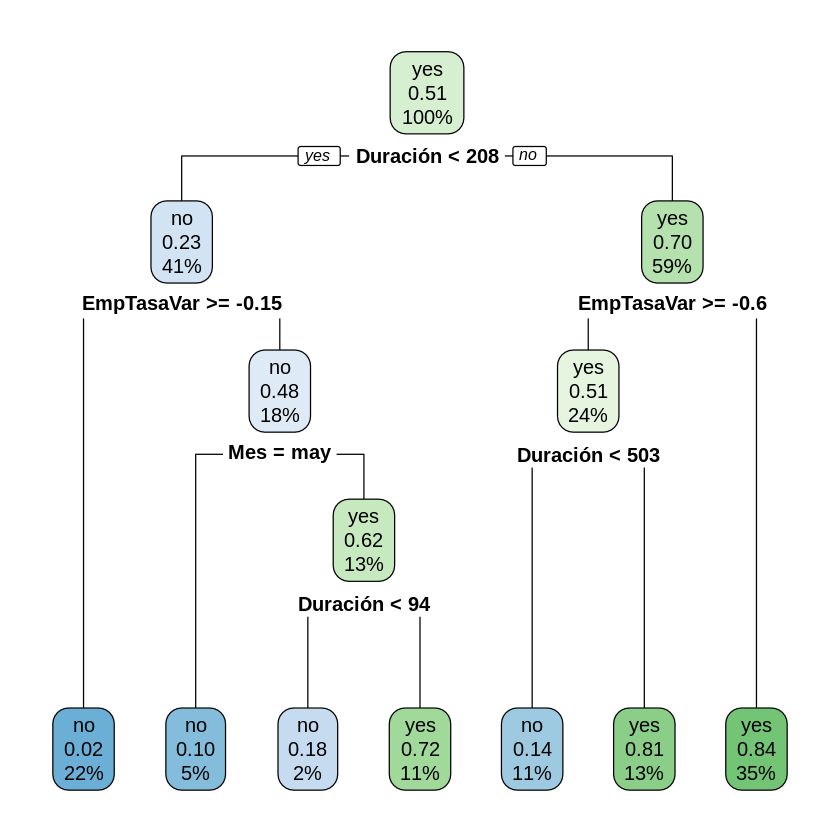

In [ ]:
# Decision Tree 3
DT_model3 <- rpart(as.factor(OK) ~ ., data=training.data3, method="class", minbucket=10)

cat("\n****Desempeño Decision Tree en conjunto de entrenamiento 2****\n")
cat("****Balance entre SÍ y NO EN 1****\n")
DT_predict_train3 <- predict(DT_model3, testing.data3, type = "class")
confusionMatrix(DT_predict_train3, as.factor(testing.data3$OK), positive="yes")

rpart.plot(DT_model3)

[1] 3859   17

[1] 5788   17

[1] 6270   17

[1] 3377   17


****Desempeño Decision Tree en conjunto de entrenamiento 2****
****Balance entre SÍ y NO EN 1,5****


Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1730  188
       yes  287 1172
                                          
               Accuracy : 0.8593          
                 95% CI : (0.8472, 0.8709)
    No Information Rate : 0.5973          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.711           
                                          
 Mcnemar's Test P-Value : 6.907e-06       
                                          
            Sensitivity : 0.8618          
            Specificity : 0.8577          
         Pos Pred Value : 0.8033          
         Neg Pred Value : 0.9020          
             Prevalence : 0.4027          
         Detection Rate : 0.3471          
   Detection Prevalence : 0.4320          
      Balanced Accuracy : 0.8597          
                                          
       'Positive' Class : yes             
                        

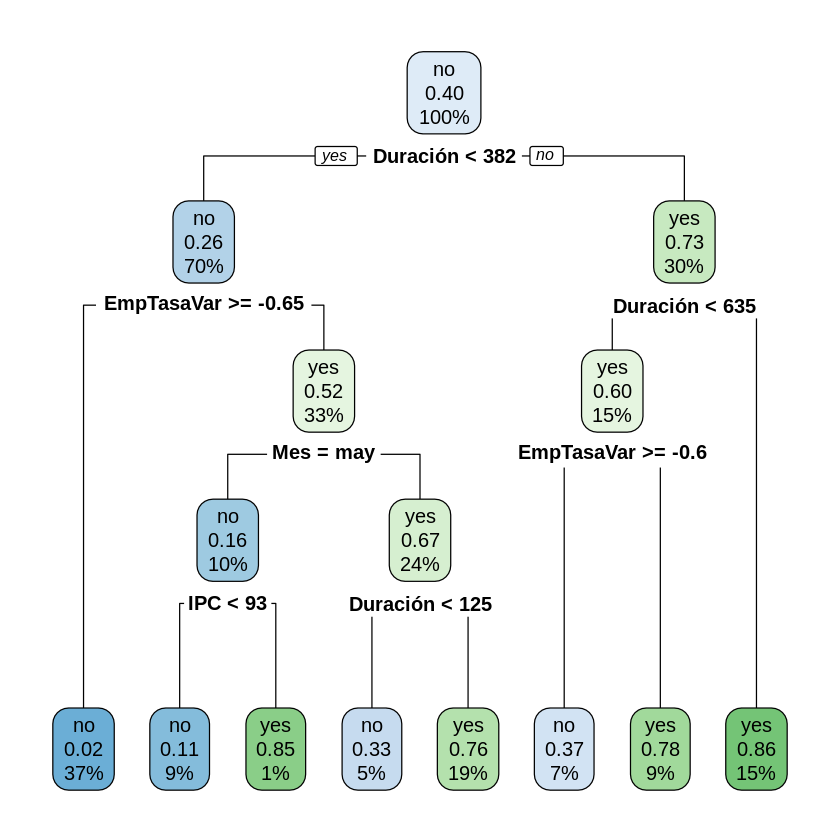

In [ ]:
set.seed(123)

# (B) Se balancean las clases para entrenar: se busca acercar la cantidad de ejemplos positivos, con los negativos.
# Para esto se puede definir la cantidad de ejemplos de la clase más abundante (NO)
# en una proporción (balance_ratio) de la cantidad de registros de la clase menos abundante (YES)
# balance_ratio = 1.0 implica la misma cantidad para NO y para YES ¿Cuál es la mejor? (Probar: 0.8, 1.0, 1.2, 1.5, 1.8)
balance_ratio <- 1.5

clean.subdata.YES2 <- clean.data.YES  # No se aplica sample(): se usan todos los ejemplos de la clase OK (que es la que tiene menos ejemplos)
clean.subdata.NO2 <- clean.data.NO[sample(nrow(clean.data.NO), balance_ratio*dim(clean.data.YES)[1]), ]

# Muestra cantidad de ejemplos contenidos en cada subconjunto
dim(clean.subdata.YES2)
dim(clean.subdata.NO2)

# Se juntan para el conjunto de referencia, ahora más balanceado
clean.subdata2 <- rbind(clean.subdata.YES2, clean.subdata.NO2)

# Ahora se configuran los conjuntos de entrenamiento y testing en una proporción
# (por ej: 0.65 = 65% para training y el resto para evaluación o testing)
# En esta ocasión no es necesario ni se pide cambiar la proporición,
# pero siempre queda la libertad de hacer pruebas y ver si aporta mejoras.
ratio = sample(1:nrow(clean.subdata2), size = 0.65*nrow(clean.subdata2))
training.data4 = clean.subdata2[ratio,]
testing.data4 = clean.subdata2[-ratio,]

# Se comparan los tamaños de ejemplos para entrenamiento y evaluación.
dim(training.data4)
dim(testing.data4)

# Decision Tree 4
DT_model4 <- rpart(as.factor(OK) ~ ., data=training.data4, method="class", minbucket=10)

cat("\n****Desempeño Decision Tree en conjunto de entrenamiento 2****\n")
cat("****Balance entre SÍ y NO EN 1,5****\n")
DT_predict_train4 <- predict(DT_model4, testing.data4, type = "class")
confusionMatrix(DT_predict_train4, as.factor(testing.data4$OK), positive="yes")

rpart.plot(DT_model4)

## Complemento: Implementación de un modelo Random Forest para comparar

Esta sección implementa un Random Forest, como modelo de clasificación de referencia, cuyo desempeño será comparado con el Árbol de Decisión anterior, que no tuvo aplicación de las mejoras al dataset del ejercicio anterior.

**Pregunta 3** (1,5 puntos): Si se compara con el desempeño del Árbol de Decisión en el paso 3 anterior ¿Qué diferencia fundamental (ventaja/desventaja) se ve en los indicadores de desempeño y por qué se podría haber logrado esta diferencia?

**Pregunta 4** (1,5 puntos): Al comparar el desempeño del modelo con los datos de entrenamiento y con los datos de evaluación, se puede ver una diferencia importante. ¿Cómo se interpreta esta diferencia y, en teoría, cómo se podría resolver?



In [ ]:
dim(training.data)
dim(testing.data)

[1] 24712    21

[1] 16476    21

**Random Forest**

In [ ]:
set.seed(123)
rftraining.data <- na.omit(training.data)
rftesting.data <- na.omit(testing.data)

# Random Forest
RF_model <- randomForest(as.factor(OK) ~ ., data = rftraining.data, method="class")


cat("\n****Desempeño Random Forest en conjunto de entrenamiento****\n")
RF_predict_train <- predict(RF_model, rftraining.data, type = "class")
confusionMatrix(RF_predict_train, as.factor(rftraining.data$OK), positive="yes")

cat("\n---------------------------------------------------------\n")
cat("\n****Desempeño Random Forest en conjunto de evaluación****\n")
RF_predict <- predict(RF_model, rftesting.data, type = "class")
confusionMatrix(RF_predict, as.factor(rftesting.data$OK), positive="yes")


****Desempeño Random Forest en conjunto de entrenamiento****


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  15931    62
       yes     3  2262
                                          
               Accuracy : 0.9964          
                 95% CI : (0.9955, 0.9973)
    No Information Rate : 0.8727          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9838          
                                          
 Mcnemar's Test P-Value : 6.291e-13       
                                          
            Sensitivity : 0.9733          
            Specificity : 0.9998          
         Pos Pred Value : 0.9987          
         Neg Pred Value : 0.9961          
             Prevalence : 0.1273          
         Detection Rate : 0.1239          
   Detection Prevalence : 0.1241          
      Balanced Accuracy : 0.9866          
                                          
       'Positive' Class : yes             
                  


---------------------------------------------------------

****Desempeño Random Forest en conjunto de evaluación****


Confusion Matrix and Statistics

          Reference
Prediction    no   yes
       no  10276   714
       yes   419   821
                                          
               Accuracy : 0.9074          
                 95% CI : (0.9021, 0.9124)
    No Information Rate : 0.8745          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5401          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.53485         
            Specificity : 0.96082         
         Pos Pred Value : 0.66210         
         Neg Pred Value : 0.93503         
             Prevalence : 0.12551         
         Detection Rate : 0.06713         
   Detection Prevalence : 0.10139         
      Balanced Accuracy : 0.74784         
                                          
       'Positive' Class : yes             
                  


---

**Complemento: Ejercicio de comprobación manual**


Para verificar que alguno de los modelos realmente predice correctamente, se comprueba con los datos de una persona en particular, pidiendo la predicción al modelo. A continuación hay dos ejemplos, que se pueden modificar para ver su resultado, cambiando valores y también, cambiando el modelo a utilizar en la predicción. No se necesita modificar, ni comentar esta parte en la entrega.

In [ ]:
marketing.clean2 <- marketing.data
clean.data.YES2 <- marketing.clean[marketing.clean2$OK == 'yes',]
clean.data.NO2 <- marketing.clean[marketing.clean2$OK == 'no',]

balance_ratio <- 1.5
clean.subdata.YES3 <- clean.data.YES2  # No se aplica sample(): se usan todos los ejemplos de la clase OK (que es la que tiene menos ejemplos)
clean.subdata.NO3 <- clean.data.NO2[sample(nrow(clean.data.NO2), balance_ratio*dim(clean.data.YES2)[1]), ]

clean.subdata3 <- rbind(clean.subdata.YES3, clean.subdata.NO3)

In [ ]:
# Ejemplo 1: La predicción debería ser "YES"

set.seed(123)
#clean.subdata3 <- marketing.data
sample_x <- clean.subdata3[1,]
sample_x[1,1] <- 32       # Edad
sample_x[1,2] <- 'admin.' # Ocupación
sample_x[1,3] <- 'single' # EstadoCivil
sample_x[1,4] <- 'university.degree'  # Educación
sample_x

prediction <- predict(RF_model, sample_x)
prediction


# Ejemplo 2: La predicción debería ser "NO"
sample_x2 <- clean.subdata[1,]
sample_x2[1,1] <- 42
sample_x2[1,11] <- 10   # Duración
sample_x2[1,19] <- 5000  # NumEmpleados
sample_x2

prediction <- predict(RF_model, sample_x2)
prediction


,Edad,Ocupación,EstadoCivil,Educación,Default,Hipotecario,Consumo,Contacto,Mes,Día,⋯,NumContactos,DíasAtrás,Previo,ResultadoPrevio,EmpTasaVar,IPC,ICC,Euribor3m,NumEmpleados,OK
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,32,admin.,single,university.degree,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


1 
no 
Levels: no yes

,Edad,Ocupación,EstadoCivil,Educación,Default,Hipotecario,Consumo,Contacto,Mes,Día,⋯,NumContactos,DíasAtrás,Previo,ResultadoPrevio,EmpTasaVar,IPC,ICC,Euribor3m,NumEmpleados,OK
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,42,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,5000,5191,no


1 
no 
Levels: no yes